<a href="https://colab.research.google.com/github/ikramGha/Prolog/blob/main/data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [10]:
df = pd.read_csv("student_health_data.csv")

In [11]:
df.shape[1]

14

In [12]:
df.shape[0]

1000

In [13]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
       'Stress_Level_Self_Report', 'Physical_Activity', 'Sleep_Quality',
       'Mood', 'Study_Hours', 'Project_Hours', 'Health_Risk_Level'],
      dtype='object')

In [14]:
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Heart_Rate,float64
Blood_Pressure_Systolic,float64
Blood_Pressure_Diastolic,float64
Stress_Level_Biosensor,float64
Stress_Level_Self_Report,float64
Physical_Activity,object
Sleep_Quality,object


In [15]:
df.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
# Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
numerical_cols = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor', 'Study_Hours', 'Project_Hours']
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [17]:
# Imputer les valeurs manquantes pour les variables catégorielles
categorical_cols = ['Gender', 'Physical_Activity', 'Sleep_Quality', 'Mood']
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [18]:
# Déduplication
df.drop_duplicates(inplace=True)

In [19]:
# Normalisation des données
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [20]:
# Encodage des variables catégorielles (Label Encoding pour Gender, One-Hot Encoding pour les autres)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [21]:
# Encodage de 'Gender' (binaire)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [22]:
# One-Hot Encoding pour 'Physical_Activity', 'Sleep_Quality', 'Mood'
df = pd.get_dummies(df, columns=['Physical_Activity', 'Sleep_Quality', 'Mood'], drop_first=True)

In [23]:
# Vérification après prétraitement
print(df.head())

   Student_ID       Age  Gender  Heart_Rate  Blood_Pressure_Systolic  \
0           1  1.518028       1   -2.037618                 0.160145   
1           2  0.019974       0   -1.276306                -0.620468   
2           3  0.519325       1   -1.132890                -0.716565   
3           4  1.518028       1    0.704869                 0.363557   
4           5 -0.479377       1   -0.184394                -0.843994   

   Blood_Pressure_Diastolic  Stress_Level_Biosensor  Stress_Level_Self_Report  \
0                  0.473712               -0.904328                  9.028669   
1                 -0.431531               -0.687847                  5.819697   
2                  0.409786                0.501480                  5.892360   
3                 -0.182961                0.356327                  6.884001   
4                  0.085109                0.686297                  4.483450   

   Study_Hours  Project_Hours Health_Risk_Level  Physical_Activity_Low  \
0     

In [24]:
#l'analyse multivariate
# 1. Standardizing the data
numerical_cols = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
                  'Study_Hours', 'Project_Hours']
# Standardizing the data
scaler = StandardScaler()
df_scaled = df[numerical_cols]
df_scaled = scaler.fit_transform(df_scaled)

In [25]:
# 2. Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(df_scaled)

# Creating a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

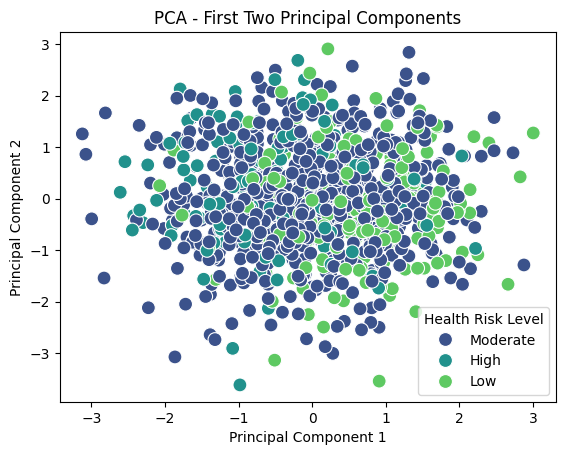

In [26]:
# Scatter plot of the first two principal components
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Health_Risk_Level'], palette='viridis', s=100)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Health Risk Level')
plt.show()

In [ ]:
# Liste des colonnes numériques
numerical_cols = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                  'Stress_Level_Biosensor', 'Study_Hours', 'Project_Hours']

# Calcul des statistiques et affichage pour chaque colonne numérique
for column in numerical_cols:
    # Calcul des statistiques
    mean = df[column].mean()
    median = df[column].median()
    mode_value = df[column].mode()[0]
    mode_count = df[column].value_counts()[mode_value]
    range_value = df[column].max() - df[column].min()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    variance = df[column].var()
    std_dev = df[column].std()
    coefficient_of_variation = (std_dev / mean) * 100 if mean != 0 else 0  # Eviter la division par 0

    # Affichage des résultats
    print(f"\nStatistiques pour {column}:")
    print(f"  - Moyenne : {mean:.2f}")
    print(f"  - Médiane : {median:.2f}")
    print(f"  - Mode : {mode_value} (Apparaît {mode_count} fois)")
    print(f"  - Étendue : {range_value:.2f}")
    print(f"  - 1er Quartile (Q1) : {q1:.2f}")
    print(f"  - 3ème Quartile (Q3) : {q3:.2f}")
    print(f"  - Intervalle interquartile (IQR) : {iqr:.2f}")
    print(f"  - Variance : {variance:.2f}")
    print(f"  - Écart type : {std_dev:.2f}")
    print(f"  - Coefficient de variation : {coefficient_of_variation:.2f}%")

In [ ]:
# Analyse univariée des variables numériques
numerical_cols = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                  'Stress_Level_Biosensor', 'Study_Hours', 'Project_Hours']

for col in numerical_cols:
    print(f"Analyse univariée pour {col} :")
    print(df[col].describe())
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

In [ ]:
# 3. Créer des graphiques appropriés pour les variables numériques
for col in numerical_cols:
 # Diagramme en boîte (boxplot)
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f'Diagramme en boîte de {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
# Liste des colonnes numériques
numerical_cols = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                  'Stress_Level_Biosensor', 'Study_Hours', 'Project_Hours']

# Définir le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = (len(numerical_cols) // n_cols) + (len(numerical_cols) % n_cols)

# Créer la figure et les axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Créer les graphiques pour chaque colonne numérique
for i, column in enumerate(numerical_cols):
    ax = axes[i]

    # Histogramme
    sns.histplot(df[column], kde=True, ax=ax, color='skyblue', bins=30)
    ax.set_title(f"Histogramme de {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Fréquence")

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()

In [ ]:
# 6. Corrélation entre les variables numériques
# Créer une heatmap pour la corrélation entre les variables numériques
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

In [ ]:
# Liste des colonnes catégorielles
categorical_cols = ['Gender', 'Physical_Activity', 'Sleep_Quality', 'Mood']

# Calcul des fréquences pour chaque variable catégorielle
for col in categorical_cols:
    # Fréquence des valeurs
    value_counts = df[col].value_counts()
    print(f"\nFréquence des valeurs pour {col}:")
    print(value_counts)

In [ ]:

    # Graphique en barres de la distribution des catégories
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution des catégories pour {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'occurrences")
    plt.show()

In [ ]:
# Diagrammes en boîte pour voir la distribution des variables numériques par rapport aux variables catégorielles
for col in categorical_cols:
    for numerical_col in ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=col, y=numerical_col, palette='Set2')
        plt.title(f"Distribution de {numerical_col} par {col}")
        plt.xlabel(col)
        plt.ylabel(numerical_col)
        plt.show()